In [10]:
import pyke as pk
oid=211410963
loc = 'stars_shortlist/M67'
tpf_loc = 'stars_shortlist/M67/ktwo{}-c05_lpd-targ.fits.gz'.format(oid)
lc_loc = 'stars_shortlist/M67/hlsp_everest_k2_llc_{}-c05_kepler_v2.0_lc.fits'.format(oid)

2018-02-15 16:33:23.246487 GetLC started
stars_shortlist/M67/hlsp_everest_k2_llc_211410963-c05_kepler_v2.0_lc.fits 
outfile = /home/ekaterina/research/k2_cluster_flares/aprun/211/211410963-c05_kepler_v2.0_lc.fits
dl
[0]
dr
[3620]
0 2018-02-15 16:33:23.320502 MultiFind started
trial (k): 0.  peak period (pk):40.2417377788.  peak power (pp):0.193955808057
trial (k): 1.  peak period (pk):40.2417377788.  peak power (pp):0.193955808057


/home/ekaterina/Documents/appaloosa/appaloosa/appaloosa.py:271: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version
  error = np.ones_like(time[isrl]) * np.nanmedian(rolling_std(flux_raw[isrl], win_size, center=True))
/home/ekaterina/Documents/appaloosa/appaloosa/detrend.py:112: FutureWarning: pd.rolling_median is deprecated for ndarrays and will be removed in a future version
  flux_sm = rolling_median(np.array(flux[x], dtype='float'), krnl)
/home/ekaterina/Documents/appaloosa/appaloosa/detrend.py:74: FutureWarning: pd.rolling_median is deprecated for ndarrays and will be removed in a future version
  flux_sm = rolling_median(flux[dl[i]:dr[i]], krnl)
/home/ekaterina/Documents/appaloosa/appaloosa/detrend.py:359: FutureWarning: pd.rolling_median is deprecated for ndarrays and will be removed in a future version
  flux_i_sm = rolling_median(flux_i, nptsmooth, center=True)


trial (k): 2.  peak period (pk):40.2417377788.  peak power (pp):0.193955808057
trial (k): 3.  peak period (pk):40.2417377788.  peak power (pp):0.193955808057
trial (k): 4.  peak period (pk):40.2417377788.  peak power (pp):0.193955808057
IRLSSpline: knots:  (361,)
IRLSSpline: time:  (3620,) 2306.61102064 2306.61102064 2381.43224587 2381.43224587
IRLSSpline: <weight> =  0.0941142550416
[]
[-2361.84672569 -2361.84672569 -2361.84672569 ..., -2375.97214312
 -2375.97214312 -2375.97214312]


/home/ekaterina/Documents/appaloosa/appaloosa/detrend.py:359: FutureWarning: pd.rolling_median is deprecated for ndarrays and will be removed in a future version
  flux_i_sm = rolling_median(flux_i, nptsmooth, center=True)
/home/ekaterina/Documents/appaloosa/appaloosa/appaloosa.py:703: FutureWarning: pd.rolling_std is deprecated for ndarrays and will be removed in a future version
  sig_i = np.nanmedian(rolling_std(flux, std_window, center=True))
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


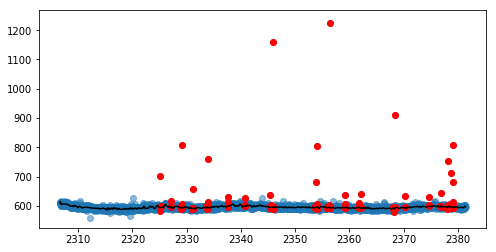

2018-02-15 16:33:24.424956 FakeFlares started
20 flare candidates found
211410963	2018-02-15 16:33:29.159545	20	stars_shortlist/M67/hlsp_everest_k2_llc_211410963-c05_kepler_v2.0_lc.fits	5	68.1263888889	29.424381432364804	2306.61102064

2018-02-15 16:33:29.183179Getting output header
2018-02-15 16:33:29.235491Getting FlareStats


/usr/local/lib/python3.5/dist-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/ekaterina/Documents/appaloosa/appaloosa/aflare.py:88: RuntimeWarning: divide by zero encountered in true_divide
  flare = np.piecewise(t, [(t<= tpeak) * (t-tpeak)/fwhm > -1.,
/home/ekaterina/Documents/appaloosa/appaloosa/aflare.py:88: RuntimeWarning: invalid value encountered in true_divide
  flare = np.piecewise(t, [(t<= tpeak) * (t-tpeak)/fwhm > -1.,
/home/ekaterina/Documents/appaloosa/appaloosa/aflare.py:88: RuntimeWarning: invalid value encountered in greater
  flare = np.piecewise(t, [(t<= tpeak) * (t-tpeak)/fwhm > -1.,
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


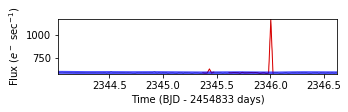

In [11]:
%matplotlib inline

from appaloosa import RunLC
import os
import numpy as np

os.chdir('/home/ekaterina/Documents/appaloosa')
RunLC(lc_loc, dbmode='everest', display=True, debug=True, dofake=False, writeout=True)
appaloosaappaloosa
Name
Last Modified

"""

script to carry out flare finding in Kepler LC's

​

"""

import io # for writeout option in RunLC

import numpy as np

import os.path

from os.path import expanduser #On Unix and Windows, return the argument with an initial component of sim or sim user replaced by that users home directory.

import time

import datetime

from version import __version__ #according to PEP 8, __version__ return the version number of the module. It is stored in version.py

from aflare import aflare1

import detrend

from gatspy.periodic import LombScargleFast

import warnings

import matplotlib.pyplot as plt

import pandas as pd

from pandas import rolling_std #Moving standard deviation. By default, the result is set to the right edge of the window. This can be changed to the center of the window by setting center=True.

from scipy import stats

from scipy.optimize import curve_fit

from scipy.signal import wiener

from scipy import signal

from astropy.io import fits

import matplotlib

from glob import glob

matplotlib.rcParams.update({'font.size':14})

matplotlib.rcParams.update({'font.family':'sans-serif'})

matplotlib.rcParams.update({'font.sans-serif':'Arial'})

​

# from rayleigh import RayleighPowerSpectrum

​

​

#-----------------------------------------------------------------------------------------------------------------------------

#-----------------------------------------------------------------------------------------------------------------------------

# DATA READING FUNCTIONS:

#-----------------------------------------------------------------------------------------------------------------------------

import pyke as pk

oid=211410963

loc = 'stars_shortlist/M67'

tpf_loc = 'stars_shortlist/M67/ktwo{}-c05_lpd-targ.fits.gz'.format(oid)

lc_loc = 'stars_shortlist/M67/hlsp_everest_k2_llc_{}-c05_kepler_v2.0_lc.fits'.format(oid)



In [3]:
import pandas as pd

flux = pd.read_csv(str(oid)+'_flux.csv')#,usecols=['time','flux_gap','flux_model'])
flares = pd.read_csv(str(oid)+'_flares.csv')#,usecols=['istart','istop'])
#flux.plot(x='time',y=['flux_gap','flux_model'])
#flux.plot(x='time',y='flux_model')
# for index, row in flares.iterrows():
#     print(flux.loc[row.istart:row.istop])
flares.head()

,Unnamed: 0,istart,istop
0,0,893,898
1,1,1076,1089
2,2,1179,1185
3,3,1308,1323
4,4,1652,1655


In [30]:
 flux['tpf_time'] = 'Nan'
for id_,row in flux.iterrows():
     flux['tpf_time'].iloc[id_] = tpf.time[np.argmin(abs(tpf.time-row.time))]
     #print(tpf.time[max(0,id_-5):min(id_+5,len(tpf.time))])


flux.iloc[645:655]

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,flux_gap,flux_model,time,tpf_time
645,594.193148,591.142245,2319.973600,2319.97
646,592.968500,591.568623,2319.994032,2319.99
647,588.196984,591.906832,2320.014464,2320.01
648,593.040954,592.116794,2320.034896,2320.03
649,587.571959,592.159695,2320.055328,2320.06
650,595.857964,592.030835,2320.075759,2320.08
651,625.186891,591.762623,2320.096191,2320.1
652,586.587388,591.389337,2320.116623,2320.12
653,590.517267,590.945257,2320.137055,2320.14
654,581.991701,590.464660,2320.157487,2320.16


In [32]:
flux['isflare'] = False
print(flux.head())
for id_, row in flares.iterrows():
    flux['isflare'].iloc[row.istart:row.istop+1] = True
flux.to_csv('{}_tpf_times_FLUX.csv'.format(oid))
flux.iloc[645:655]

     flux_gap  flux_model         time tpf_time  isflare
0  606.651250  610.151305  2306.611021  2306.61    False
1  610.636962  612.618725  2306.631453  2306.63    False
2  608.513673  614.087421  2306.651885  2306.65    False
3  610.759530  614.701616  2306.672317  2306.67    False
4  605.865683  614.605499  2306.692750  2306.69    False


/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,flux_gap,flux_model,time,tpf_time,isflare
645,594.193148,591.142245,2319.973600,2319.97,False
646,592.968500,591.568623,2319.994032,2319.99,False
647,588.196984,591.906832,2320.014464,2320.01,False
648,593.040954,592.116794,2320.034896,2320.03,False
649,587.571959,592.159695,2320.055328,2320.06,False
650,595.857964,592.030835,2320.075759,2320.08,True
651,625.186891,591.762623,2320.096191,2320.1,True
652,586.587388,591.389337,2320.116623,2320.12,False
653,590.517267,590.945257,2320.137055,2320.14,False
654,581.991701,590.464660,2320.157487,2320.16,False


In [58]:
flux_648 = pd.read_csv('211416648_tpf_times_FLUX.csv')
flux_648.time = flux_648.time.round(decimals=4)
flux.time = flux.time.round(decimals=4)
a = flux.merge(flux_648, on='time')
#print(flux.head())
#print(flux_648.head())
#print(a.head())
s = a[(a.isflare_x == a.isflare_y)]
print(s.info())
p = a[(a.isflare_x == True)]
print(p.info())
t = s[s.isflare_x == True]
print(t)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3160 entries, 0 to 3539
Data columns (total 10 columns):
flux_gap_x      3160 non-null float64
flux_model_x    3160 non-null float64
time            3160 non-null float64
tpf_time_x      3160 non-null object
isflare_x       3160 non-null bool
Unnamed: 0      3160 non-null int64
flux_gap_y      3160 non-null float64
flux_model_y    3160 non-null float64
tpf_time_y      3160 non-null float64
isflare_y       3160 non-null bool
dtypes: bool(2), float64(6), int64(1), object(1)
memory usage: 228.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 643 to 3432
Data columns (total 10 columns):
flux_gap_x      231 non-null float64
flux_model_x    231 non-null float64
time            231 non-null float64
tpf_time_x      231 non-null object
isflare_x       231 non-null bool
Unnamed: 0      231 non-null int64
flux_gap_y      231 non-null float64
flux_model_y    231 non-null float64
tpf_time_y      231 non-null float64
isflare_y

In [6]:
tpf = pk.KeplerTargetPixelFile(tpf_loc)
apmask = tpf.pipeline_mask*0.01
#d = tpf.flux*tpf.pipeline_mask
tpf.time


array([ 2306.61101947,  2306.63145179,  2306.65188391, ...,  2381.39137948,
        2381.41181141,  2381.43224324])

In [9]:
select_isflare = flux[flux.isflare==True]
isflare_tpf_times = select_isflare.tpf_time.tolist()

for i in isflare_tpf_times[35:65]:
    id_ = np.where(tpf.time == i)[0][0]
    print(id_)

1091
1108
1109
1110
1270
1271
1272
1273
1274
1275
1363
1364
1365
1366
1367
1368
1369
1370
1371
1451
1452
1453
1453
1454
1455
1456
1457
1458
1459
1460


In [100]:
import k2flix
tpf2 = k2flix.TargetPixelFile(tpf_loc)
tpf2.save_movie(output_fn='test.gif', start=1270, stop=1275, step=1,
               binning=1, fps=0.5, dpi=None, stretch='log',
               min_cut=None, max_cut=None, min_percent=60, max_percent=100,
               cmap='gray', time_format='frameno', show_flags=True, data_col='FLUX',
               ignore_bad_frames=True,)

 33%|███▎      | 2/6 [00:00<00:00, 14.71it/s]

Creating test.gif


100%|██████████| 6/6 [00:00<00:00, 15.18it/s]


<class 'matplotlib.axes._subplots.AxesSubplot'>
fig size: 72.0 DPI, size in inches [ 6.  4.]
timestep 0
Figure(432x288) Figure(432x288) Axes(0.125,0.125;0.62x0.755)
timestep 0
Figure(432x288) Figure(432x288) Axes(0.125,0.125;0.62x0.755)


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


timestep 1
Figure(432x288) Figure(432x288) Axes(0.125,0.125;0.62x0.755)
timestep 2
Figure(432x288) Figure(432x288) Axes(0.125,0.125;0.62x0.755)
timestep 3
Figure(432x288) Figure(432x288) Axes(0.125,0.125;0.62x0.755)
timestep 4
Figure(432x288) Figure(432x288) Axes(0.125,0.125;0.62x0.755)
timestep 5
Figure(432x288) Figure(432x288) Axes(0.125,0.125;0.62x0.755)
timestep 6
Figure(432x288) Figure(432x288) Axes(0.125,0.125;0.62x0.755)
timestep 7
Figure(432x288) Figure(432x288) Axes(0.125,0.125;0.62x0.755)
timestep 8
Figure(432x288) Figure(432x288) Axes(0.125,0.125;0.62x0.755)
timestep 9
Figure(432x288) Figure(432x288) Axes(0.125,0.125;0.62x0.755)
timestep 0
Figure(432x288) Figure(432x288) Axes(0.125,0.125;0.62x0.755)


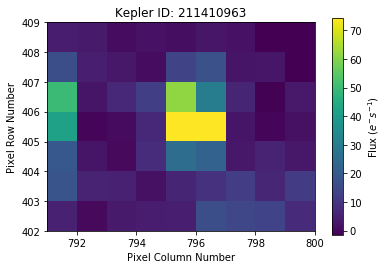

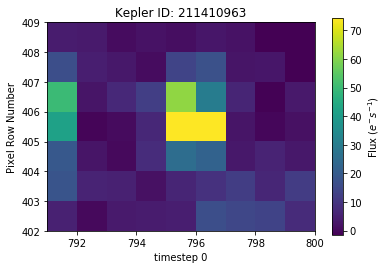

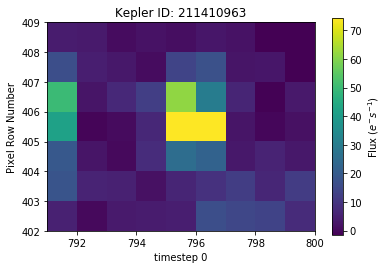

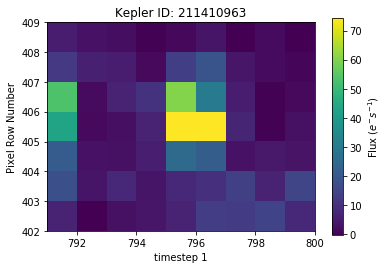

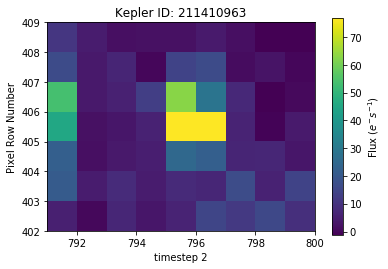

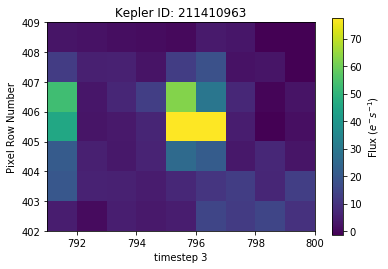

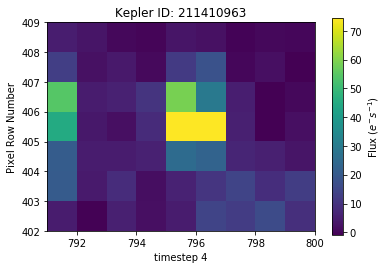

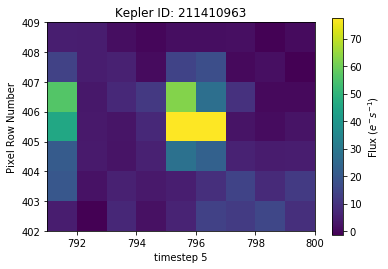

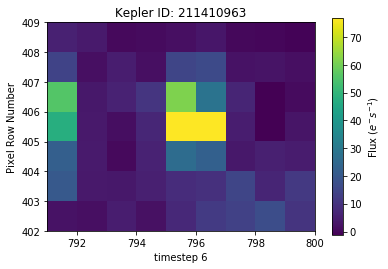

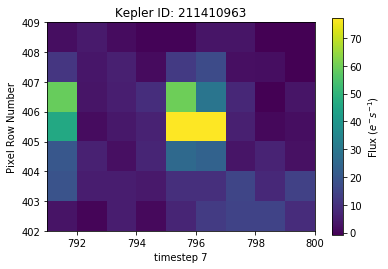

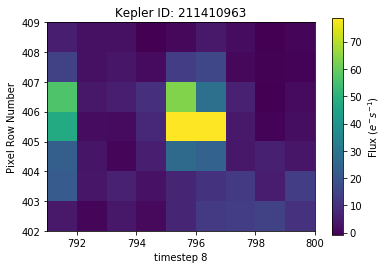

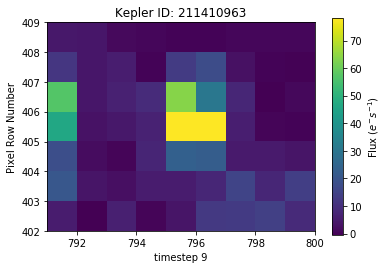

<class 'matplotlib.figure.Figure'> <class 'matplotlib.axes._subplots.AxesSubplot'>


In [46]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

#fig, ax = plt.subplots()
#print(type(ax))
#fig.set_tight_layout(True)

# Query the figure's on-screen size and DPI. Note that when saving the figure to
# a file, we need to provide a DPI for that separately.

# Plot a scatter that persists (isn't redrawn) and the initial line.
#x = np.arange(0, 20, 0.1)
#ax.scatter(x, x + np.random.normal(0, 3.0, len(x)))
#line, = ax.plot(x, x - 5, 'r-', linewidth=2)
#ax = tpf.plot(0)[1]
fig, line = tpf.plot(0)
print(type(line))
print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))

def update(i):
    label = 'timestep {}'.format(i)
    print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    #line.set_ydata(x - 5 + i)
    #print(type(fig),type(line))
    figure, line = tpf.plot(i)
    print(figure,fig, line)
    line.set_xlabel(label)
    return line, figure

if __name__ == '__main__':
    # FuncAnimation will call the 'update' function for each frame; here
    # animating over 10 frames, with an interval of 200ms between frames.
    anim = FuncAnimation(fig, update, frames=np.arange(0, 10))#, interval=200)
#     if len(sys.argv) > 1 and sys.argv[1] == 'save':
    anim.save('line.gif', dpi=80, writer='imagemagick')
#     else:
#         # plt.show() will just loop the animation forever.
    plt.show()

print(type(fig),type(line))

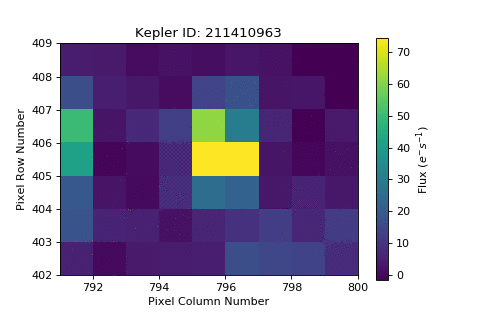

In [42]:
from IPython.display import Image
with open('line.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
#plot = tpf.plot(1200, aperture_mask=apmask)
#plot[0]

for i in isflare_tpf_times[:3]:
    id_ = np.where(tpf.time == i)[0][0]
    print(id_)
    #print(type(tpf.plot(id_, aperture_mask=apmask)[1]))
